In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # Import matplotlib for plotting

In [19]:
#1. Initial Linear Regression Model:

# a. Describe the dataset and the variables you're using for predicting employee performance.
data = pd.read_csv('company_employee_details.csv')
data

,Unnamed: 0,company,department,employee_id,age,age_when_joined,years_in_the_company,salary,annual_bonus,prior_years_experience,full_time,part_time,contractor
0,0,Glasses,BigData,16,41,38,3,68074.971354,17664.104103,3,0.000000,0.000000,1.000000
1,1,Glasses,AI,56,44,42,2,49092.147458,21551.141079,2,0.000000,0.184991,1.000000
2,2,Cheerper,Support,59,41,40,1,40000.000000,23698.878851,2,0.000000,0.919887,0.662706
3,3,Glasses,Design,40,39,32,7,108192.465506,21570.929657,1,0.930396,0.546206,0.000000
4,4,Glasses,Search Engine,47,30,22,9,71291.191132,21565.505715,2,0.525432,0.938412,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Cheerper,Search Engine,37,42,35,7,76541.841502,17366.896122,2,0.269842,0.691977,0.038156
4996,4996,Glasses,AI,1,36,25,9,113651.485089,20888.144794,1,0.356024,0.098686,0.545462
4997,4997,Glasses,Search Engine,20,35,30,5,77560.047560,24792.910000,2,0.179350,0.361727,0.459085
4998,4998,Pear,Sales,9,49,48,1,153000.000000,11700.850325,4,1.000000,0.000000,0.585987


In [8]:
# b. Implement a simple linear regression model:
X = data[['salary', 'annual_bonus', 'contractor']]
y = data['age_when_joined']

# Add a constant for the intercept in the model
X = sm.add_constant(X)

# Fit the initial linear regression model
model = sm.OLS(y, X).fit()

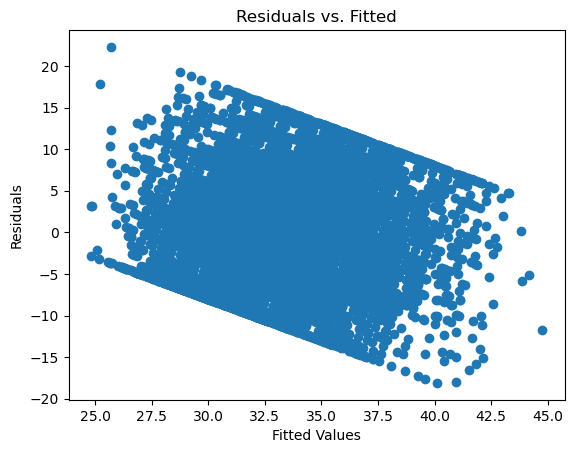

Breusch-Pagan test p-value: 0.056940767805266


In [12]:
# b. Methods for diagnosing heteroscedasticity:
# Residuals vs. Fitted plot and Breusch-Pagan test
residuals = model.resid
predicted = model.fittedvalues
plt.scatter(predicted, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# Apply Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X)
print("Breusch-Pagan test p-value:", bp_test[1])

In [13]:
# b. Ways to address heteroscedasticity:
# Transform variables (e.g., log transformation) or use weighted least squares (WLS) regression.

# Log-transform the response variable
y = np.log(y)

# Fit a WLS model
wls_model = sm.WLS(y, X, weights=1/predicted).fit()

In [15]:
# b. Use VIFs to identify multicollinearity:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Variable        VIF
0         const  29.921140
1        salary   1.111503
2  annual_bonus   1.041675
3    contractor   1.152010


In [16]:
# b. Implement the chosen strategy to reduce multicollinearity.

# Example: Using Ridge regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

Ridge()

In [17]:
# 6. Model Evaluation:
# a. Evaluate the improved model using metrics (R-squared, MAE, MSE, RMSE).

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [18]:
# b. Discuss the significance of the model's coefficients and their interpretations.
# Interpret the coefficients based on the transformed variables and reduced multicollinearity.